In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from glob import glob
import os
from skimage import measure
from matplotlib.path import Path
from skimage.io import imread
import h5py
from textwrap import wrap

In [102]:
sumPath = '/Volumes/imaging/Abhi/FR-GECO and controls FINAL Oct 23 2022/summary_4'

In [103]:
data = glob(sumPath+'/FR-GECO1a*raw*.npy')
data

['/Volumes/imaging/Abhi/FR-GECO and controls FINAL Oct 23 2022/summary_4/FR-GECO1a_W02_raw_F.npy',
 '/Volumes/imaging/Abhi/FR-GECO and controls FINAL Oct 23 2022/summary_4/FR-GECO1a_W03_raw_F.npy']

In [76]:
# df = pd.read_pickle(sumPath+'/Ca_sensor_screen_no_bleach_correction.pkl')
# df.shape
# df['Stim'].unique().shape
# df.columns

Index(['Session', 'Well', 'Stim', 'dFF', 'dFF_peak', 'F0', 'Fb', 'SNR',
       'T_peak', 'Half_rise', 'Half_decay'],
      dtype='object')

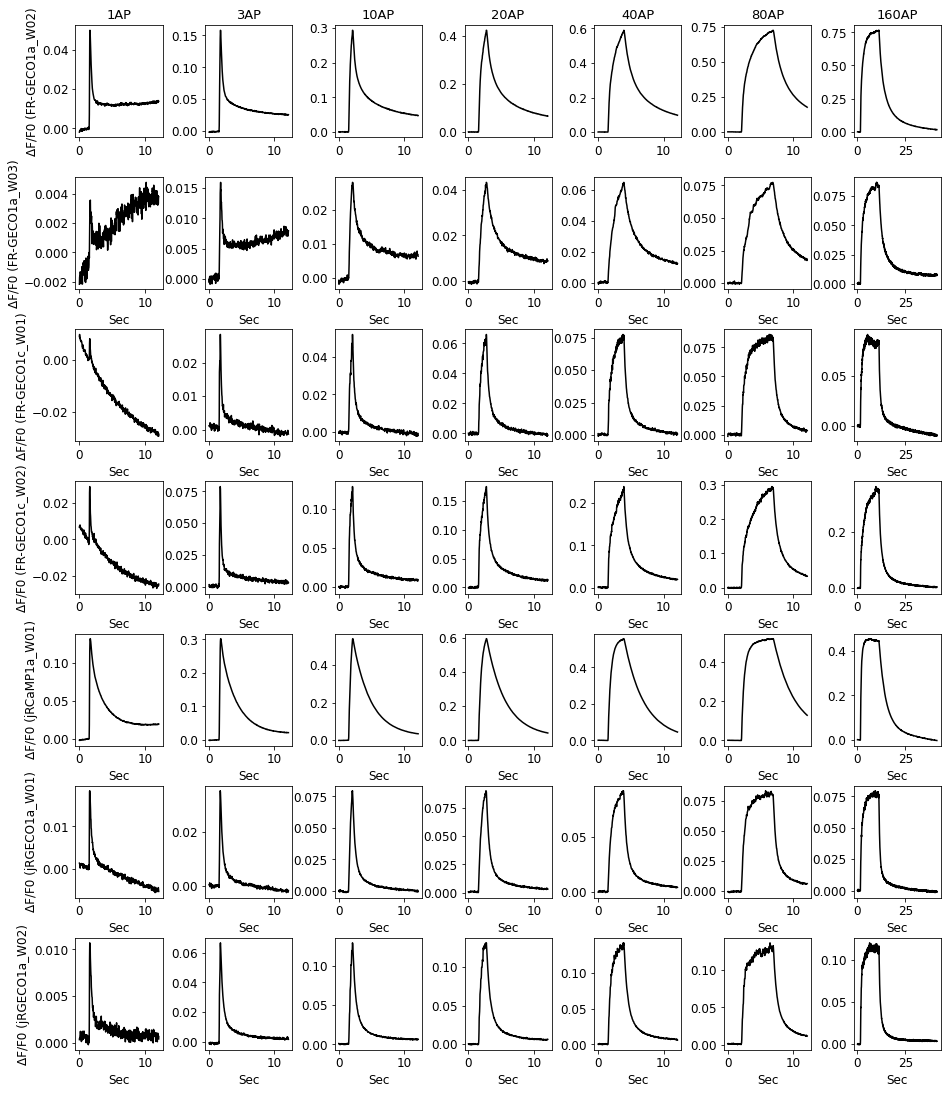

In [101]:
df_s = df[(df['Session']=='FR-GECO1a')&(df['Stim']=='1AP')]
Stim = df.Stim.unique()
plt.figure(figsize=[13,15])
# plt.figure(figsize=[13,7])
plt.rc('font', size=12)
sb = 1
for s in df.Session.unique():
    for w in df[df['Session']==s].Well.unique():
        for stim in Stim:
            df_s = df[(df['Session']==s)&(df['Well']==w)&(df['Stim']==stim)]
            for i,r in df_s.iterrows():
                ax = plt.subplot(7,len(Stim),sb)
                x = np.arange(1,df_s['dFF'].to_list()[0].shape[0]+1)/33.0
                ax.plot(x,df_s['dFF'].to_list()[0],color='k')
                if (sb-1)%len(Stim) == 0:
                    ax.set_ylabel('\u0394F/F0 (%s_%s)' %(s,w),wrap=True)

                if sb<len(Stim)+1:
                    ax.set_title(stim,size=13)
                if sb>len(Stim):
                    ax.set_xlabel('Sec')
                sb+=1
plt.tight_layout(pad=0.1)
# savePath = r'Z:\Presentations\Jihong\GENIE production\221115\Abhi_Ca_Sensor'
# if not os.path.exists(savePath):
#     os.makedirs(savePath)
# plt.savefig(savePath+'\\Abhi_Ca_sensor.png',dpi=1200)
# plt.savefig(savePath+'\\Abhi_Ca_sensor.svg')
# plt.savefig('/Users/zhengj10/Desktop/dFF_traces.svg',format='svg')
plt.show()

In [85]:
df_s['dFF'].to_list()[0].shape

(1370,)

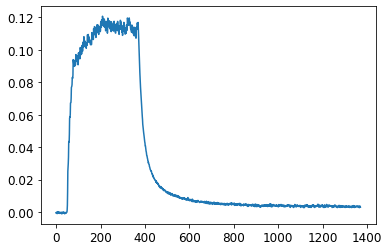

In [104]:
for i,r in df_s.iterrows():
    plt.plot(r['dFF'])
#     plt.title(r['Bleach_corrected'])
    plt.show()
    

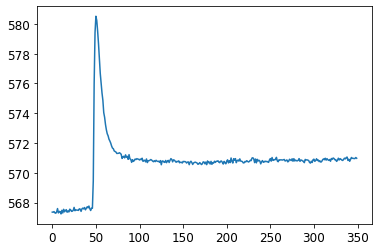

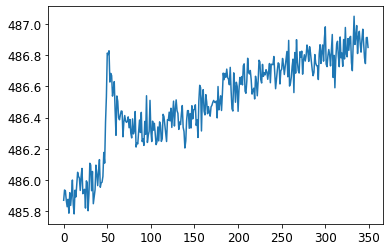

In [107]:
for d in data:
    F = np.load(d)
    plt.plot(F[150:500])
    plt.show()

In [108]:
df

,Session,Well,Stim,dFF,dFF_peak,F0,Fb,SNR,T_peak,Half_rise,Half_decay
0,FR-GECO1a,W02,1AP,"[-0.001934045792061093, -0.0014011162298499969...",0.050065,567.617379,310,134.309467,3,1,9
1,FR-GECO1a,W02,3AP,"[-0.001801827829746057, -0.0012068290211753505...",0.158021,573.739454,310,490.035449,7,3,12
2,FR-GECO1a,W02,10AP,"[0.0005080108556486335, 0.00023679765146878892...",0.293145,579.938608,310,1468.375429,20,5,29
3,FR-GECO1a,W02,20AP,"[0.00040052006293604594, 0.0008440014888332281...",0.424041,588.026486,310,1638.082391,41,9,42
4,FR-GECO1a,W02,40AP,"[0.00022023441629868796, 0.0006004142770670769...",0.589391,596.551570,310,2286.459241,79,13,52
5,FR-GECO1a,W02,80AP,"[0.0013725940119158617, 0.001331583015948756, ...",0.726924,606.270168,310,2942.038149,178,36,60
6,FR-GECO1a,W02,160AP,"[0.0015131049795866268, 0.001103527509391305, ...",0.764557,615.203043,310,2730.837749,319,19,71
7,FR-GECO1a,W03,1AP,"[-0.002168021880462063, -0.0016862556604760796...",0.004783,486.176596,304,11.474137,286,156,21
8,FR-GECO1a,W03,3AP,"[-3.1965653416343964e-05, -0.00056195326782024...",0.015941,488.447111,304,45.833331,8,4,341
9,FR-GECO1a,W03,10AP,"[-0.0006948571862714254, -0.001842544268007507...",0.028200,491.099653,304,91.266887,19,6,34


In [4]:
df = pd.read_pickle(sumPath+'/Ca_sensor_screen.pkl')

In [5]:
df.Session.unique()
df.Stim.unique()
# df.columns

array(['1AP', '3AP', '10AP', '20AP', '40AP', '80AP', '160AP'],
      dtype=object)

In [6]:
# df_s = df[(df['Session']=='GCaMP6s')&(df['Well']=='W01')&(df['Stim']=='1AP')]
df_s = df[(df['Session']=='FR-GECO1c')&(df['Stim']=='160AP')]

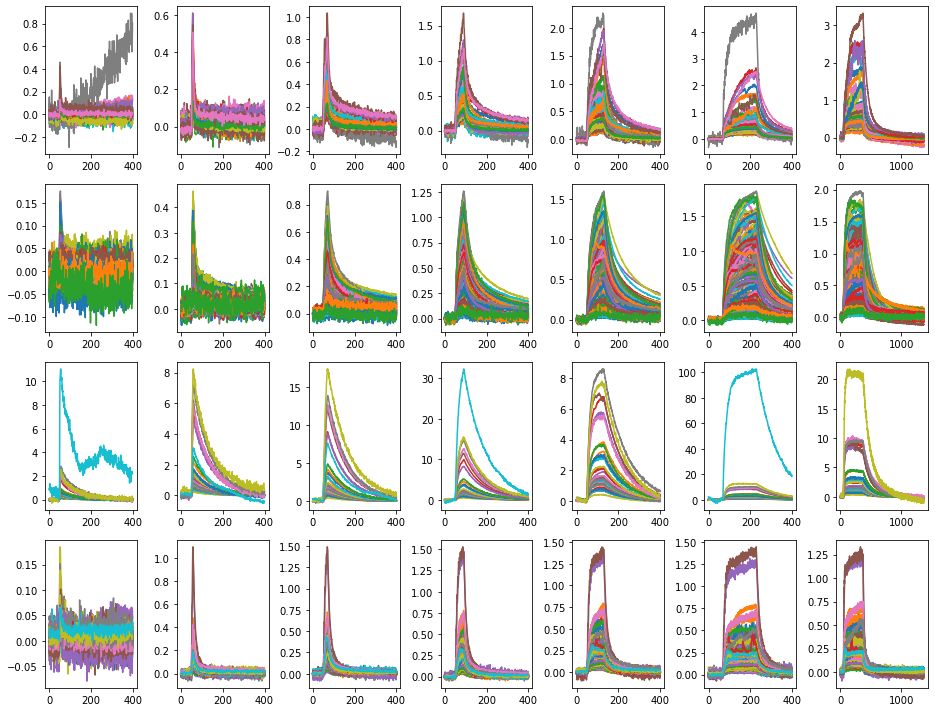

In [92]:
plt.figure(figsize=[13,10])
i=1
for s in df.Session.unique():
    for st in df.Stim.unique():
        ax = plt.subplot(4,7,i)
        df_s = df[(df['Session']==s)&(df['Stim']==st)]
        for idx,r in df_s.iterrows():
            ax.plot(r['dFF'][:])
        i+=1
plt.tight_layout()
plt.show()

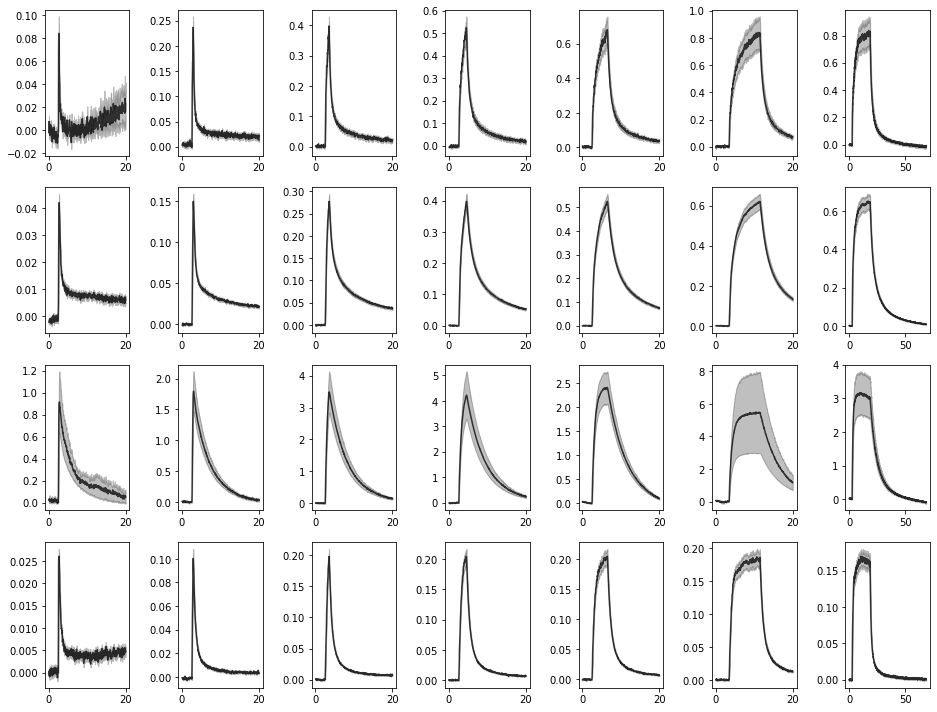

In [18]:
plt.figure(figsize=[13,10])
i=1
for s in df.Session.unique():

    for st in df.Stim.unique():
        ax = plt.subplot(4,7,i)
        df_s = df[(df['Session']==s)&(df['Stim']==st)]
        mean = np.mean(df_s.dFF.to_list(),axis=0)
        x = np.arange(1,mean.shape[0]+1)/20
        sem = np.std(df_s.dFF.to_list(),axis=0)/np.sqrt(len(df_s))
        
        ax.plot(x,mean,color='k',alpha=0.75)
        ax.fill_between(x,mean+sem,mean-sem,color='k',alpha=0.25)

#         markers, caps, bars = plt.errorbar(x,mean,yerr=sem,ecolor='black',color='k',alpha=0.5)
#         [bar.set_alpha(0.1) for bar in bars]
#         [cap.set_alpha(0.1) for cap in caps]

        i+=1
        
plt.tight_layout()
plt.show()

In [71]:
df_s.shape

(40, 14)

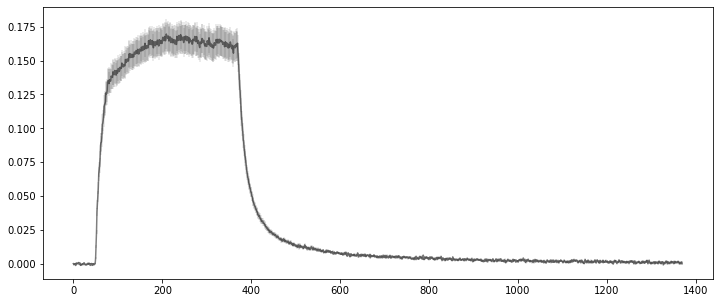

In [16]:
plt.figure(figsize=[12,5])
mean = np.mean(df_s.dFF.to_list(),axis=0)
x = np.arange(mean.shape[0])
sem = np.std(df_s.dFF.to_list(),axis=0)/np.sqrt(len(df_s))

# plt.plot(x,mean,color='k',alpha=0.75)
# plt.fill_between(x,mean+sem,mean-sem,color='k',alpha=0.25)

markers, caps, bars = plt.errorbar(x,mean,yerr=sem,ecolor='black',color='k',alpha=0.5)
[bar.set_alpha(0.1) for bar in bars]
[cap.set_alpha(0.1) for cap in caps]
plt.show()


In [25]:
plt.fill_between?

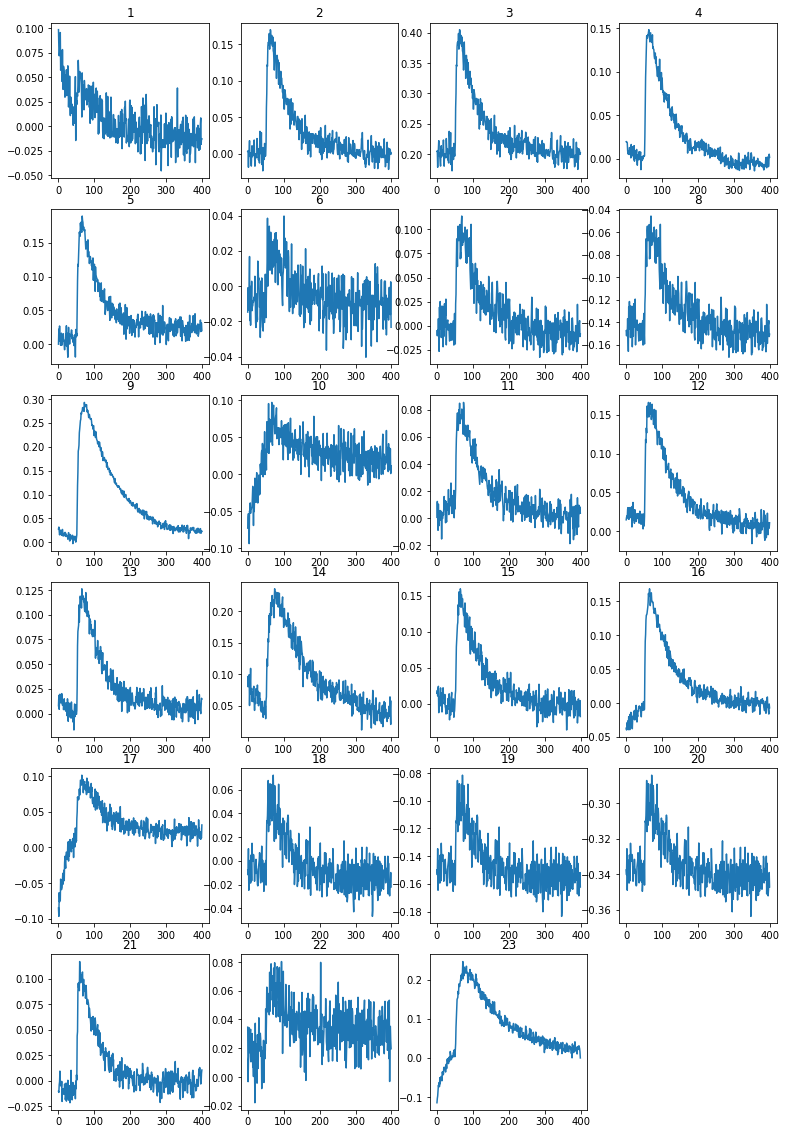

In [35]:
plt.figure(figsize=[13,20])
sb = 1
for i,r in df_s.iterrows():
    ax = plt.subplot(6,4,sb)
    ax.plot(r['dFF'])
    ax.set_title(r['ROI_#'])
    sb+=1

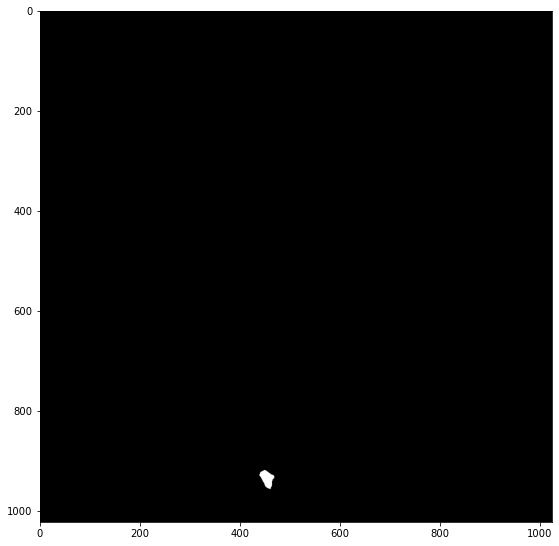

In [36]:
# files = glob(sumPath+'/*dFF_all*')
# sorted(files)
plt.figure(figsize=[9.4,9.4])
df_s.columns
roi = r['ROI_coordinates']
plt.imshow(roi,cmap='gray')

In [37]:
# df_s.Session.unique()

In [17]:
img = '/Users/zhengj10/Desktop/Test/GCaMP6s/W01/Tif/GCaMP6s sequence W01.tif'
img_arr = imread(img)
img_arr.shape

(2488, 1022, 1024)

In [18]:
F = a*img_arr
F.shape

(2488, 1022, 1024)

In [39]:
B = np.sum(F,axis=1)
B.shape

(2488, 1024)

In [40]:
r = np.sum(B,axis=1)/np.sum(roi)
r.shape

(2488,)

In [84]:
a = np.nan

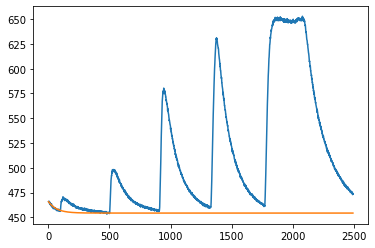

In [74]:
x = np.arange(r.shape[0])
plt.plot(x[3:],r[3:])
y = p[0]*np.exp(p[1]*x)+p[2]
# plt.plot(x,r-y)
plt.plot(x[3:],y[3:])
# plt.scatter([3,100,500],r[[3,100,500]],color='m')

In [82]:
F = np.load(sumPath+'/GCaMP6s_W01_Raw_F_roi#23.npy')

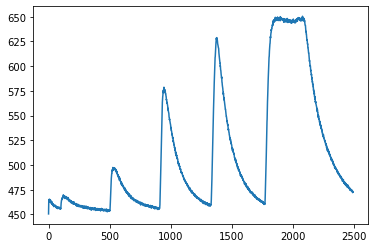

In [83]:
plt.plot(F)

In [ ]:
11.496229260000007

In [70]:
from scipy.optimize import curve_fit
p,_ = curve_fit(lambda t,a,b,c:a*np.exp(b*t)+c,[3,100,500],r[[3,100,500]],p0=[r[3]-r[500],-0.01,r[500]])

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [71]:
# plt.plot(r[3:500])
# r[[3,100,500]]
p

array([ 1.20332162e+01, -1.50269097e-02,  4.54325259e+02])

In [43]:
r['ROI_#']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
bleach = np.load(sumPath+'/GCaMP6s_W01_Bleach_fit_roi#23.npy')

In [42]:
a = bleach[0]
b = bleach[1]
c = bleach[2]

In [ ]:
plt.figure(figsize=[13,26])
a = sorted(files)
len(a)
sb = 1
for i,r in df_s.iterrows():
    raw = np.load(sumPath+'/%s_%s_raw_F_roi#%s.npy' %(r['Session'],r['Well'],r['ROI_#']))
    b = np.load(sumPath+'/%s_%s_Bleach_fit_roi#%s.npy' %(r['Session'],r['Well'],r['ROI_#']))
    ax = plt.subplot(20,5,sb)
    ax.plot(raw[:300])
#     ax.plot()
    ax.set_title(r['Session']+'_'+r['Well']+'_'+str(r['ROI_#']),size=10)
    ax.axis('off')
    sb+=1
    if sb>100:
        break
plt.tight_layout()

In [ ]:
plt.figure(figsize=[10,10])
roi = df_s[(df_s['Well']=='W01')&(df_s['ROI_#']==23)]['ROI_coordinates']
# roi = int(roi.values==True)
plt.imshow(roi.values[0],cmap='gray')
# roi.shape

In [ ]:
roi.values[0].shape

In [ ]:
# Stim = ['1AP','3AP','5AP','10AP','20AP','40AP','80AP','160AP']
# Stim = ['1AP','3AP','10AP','20AP','160AP']
Stim = ['1AP']
plt.figure(figsize=[10,5])
plt.rc('font', size=13)
sb = 1
for s in ['GCaMP6s']:
# for s in df.Session.unique():
    for stim in Stim:
        df_s = df[(df['Session']==s)&(df['Stim']==stim)]
#         print(df_s.shape)
        mean = np.mean(df_s.dFF.to_list(),axis=0)
        sem = np.std(df_s.dFF.to_list(),axis=0)/np.sqrt(len(df_s.dFF.to_list()))
        ax = plt.subplot(df.Session.unique().shape[0],len(Stim),sb)
        x = np.arange(1,df_s.dFF.to_list()[0].shape[0]+1)/33.0
        ax.plot(x,mean,color='k')
        ax.fill_between(x,mean+sem,mean-sem,color='k',alpha=0.3)
        if (sb-1)%5 == 0:
            ax.set_ylabel('\u0394F/F0 ( %s )' %s)
        if sb<6:
            ax.set_title(stim,size=13)
        if sb>10:
            ax.set_xlabel('Sec')
        sb+=1
#         if stim == '160AP':
#             print(s,ax.get_ylim())
#         if s == 'GCaMP6s':
#             ax.set_ylim([-0.12410007194216134, 2.882953440504893])
#         if s == 'GCaMP8s':
#             ax.set_ylim([-0.047451208256517254, 1.4838867698542817])
#         if s == 'T-GECO1':
#             ax.set_ylim([-0.03679510209856732, 0.458624749755896])
    plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/221011/Abhi_GECI/dFF_trace.png',dpi=1200)
plt.show()

In [ ]:
Raw = []
for i,r in df_s.iterrows():
    raw = np.load(sumPath+'/%s_%s_dFF_all_roi#%s.npy' %(r['Session'],r['Well'],r['ROI_#']))
    Raw.append(raw)
mean = np.mean(Raw,axis=0)
plt.plot(mean[50:300])
#     GCaMP6s_W01_raw_F_roi#2.npy

In [ ]:
df_s.Session.unique()

In [ ]:
plt.plot(mean[50:300])

In [ ]:
# Stim = ['1AP','3AP','5AP','10AP','20AP','40AP','80AP','160AP']
Stim = ['1AP','3AP','10AP','20AP','160AP']

plt.figure(figsize=[3.5,len(Stim)*1.5])
plt.rc('font', size=13)

sb = 1
for s in df.Session.unique():
    Mean = []
    Sem = []
    for stim in Stim:
        df_s = df[(df['Session']==s)&(df['Stim']==stim)]
        mean = np.mean(df_s.dFF_peak.to_list())
        sem = np.std(df_s.dFF_peak.to_list())/np.sqrt(len(df_s.dFF_peak.to_list()))
        Mean.append(mean)
        Sem.append(sem)
    ax = plt.subplot(3,1,sb)
    ax.errorbar(Stim,Mean,yerr=Sem,color='gray',fmt='o-')
#     ax.set_ylabel('\u0394F/F0')
#     ax.set_title(s,size=14)
    sb+=1
    if s=='T-GECO1':
        plt.xticks(rotation=45,ha='right')
    else:
        plt.xticks('')
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/221011/Abhi_GECI/dFF_peak.png',dpi=1200)
plt.show()

In [ ]:
plt.figure(figsize=[13,4])
plt.rc('font', size=13)
sp=1
for s in ['1AP', '3AP', '10AP', '20AP', '160AP']:
    df_t = df[df['Stim']==s]
    hr = df_t['Half_rise']/33.0
    df_t = df_t.assign(hr=hr)    
    ax = plt.subplot(1,5,sp)  
    
    sns.stripplot(x='Session',y='hr',data=df_t,ax=ax,alpha=0.6)
    sb = sns.boxplot(x='Session',y='hr',data=df_t,ax=ax,boxprops=dict(alpha=0.5,linewidth=3),showfliers = False)
    for i in range(df_t.Session.unique().shape[0]):
        mybox = ax.artists[i]
        r,g,b,a = mybox.get_facecolor()
        mybox.set_edgecolor((r,g,b,1))
        mybox.set_facecolor('none')
        mybox.set_linewidth(2.5)
    ax.set_title(s,size=14)
    ax.set_ylabel('Half rise time (s)')
    ax.set_xlabel('')
    plt.xticks(rotation=45,ha='right')
    sp+=1
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/221011/Abhi_GECI/Half_rise.png',dpi=1200)
plt.show()

In [ ]:
fig = plt.figure(figsize=[13,4])
plt.rc('font', size=13)
i=1
for s in ['1AP', '3AP', '10AP', '20AP', '160AP']:
    df_t = df[df['Stim']==s]
    hd = df_t['Half_decay']/33.0
    df_t = df_t.assign(hd=hd)    
    ax = plt.subplot(1,5,i)  
    i+=1
    sns.stripplot(x='Session',y='hd',data=df_t,ax=ax,alpha=0.6)
    sns.boxplot(x='Session',y='hd',data=df_t,ax=ax,boxprops=dict(alpha=0.5,linewidth=3),showfliers = False)
    ax.set_title(s,size=14)
    ax.set_ylabel('Half decay time (s)')
    ax.set_xlabel('')
    plt.xticks(rotation=45,ha='right')
# fig.set_size_inches(13,3.5)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/221011/Abhi_GECI/Half_decay.png',dpi=1200)
plt.show()

In [ ]:
# df
plt.figure(figsize=[8,8])
no = 22
F = np.load(sumPath+'/summary/T-GECO1_W01_raw_F_roi#%s.npy' %no)
ax1 = plt.subplot(211)
ax1.plot(F)
fit = np.load(sumPath+'/summary/T-GECO1_W01_Bleach_fit_roi#%s.npy' %no)
x = np.arange(F.shape[0])
y = fit[0]*np.exp(fit[1]*x)+fit[2]
ax1.plot(x,y)
ax1.set_xlim([10,2488])

ax2 = plt.subplot(212)
x = np.arange(F.shape[0])/33.0
ax2.plot(x,F)
y = fit[0]*np.exp(fit[1]*33.0*x)+fit[2]
ax2.plot(x,y)
ax2.set_xlim([10/33.0,2488/33.0])

# plt.savefig('/Users/zhengj10/Desktop/large_figure.png')

In [ ]:
plt.plot(F-y)

In [ ]:
-1/(fit[1]*33.0)

In [ ]:
plt.figure(figsize=[13,8])
plt.rc('font', size=13)

sumPath = os.path.join(nd2_dir,'summary')
dFF_files = sorted(glob(sumPath+'/*dFF_all.npy'))
param_files = sorted(glob(sumPath+'/*fit_param.npy'))
F_files = sorted(glob(sumPath+'/*raw_F.npy'))

for i in range(len(dFF_files)):
#     print(dFF_files[i])
#     print(param_files[i])
#     print(F_files[i])
    ax = plt.subplot(3,4,i+1)
    F = np.load(F_files[i])
    x = np.arange(F.shape[0])
    ax.plot(x,F)
    param = np.load(param_files[i])
    y = param[0]*np.exp(param[1]*x)+param[2]
    ax.plot(x,y)
    title = os.path.basename(F_files[i]).split('_')[0]+' '+os.path.basename(F_files[i]).split('_')[1]
    ax.set_title(title,size=14)
    if i%4 == 0:
        ax.set_ylabel('F')
    if i>=8:
        ax.set_xlabel('Frame #')
    if i == 0:
        ax.legend(['Raw F','Bleaching curve'],frameon=False,loc=(0,0.7))
    ax.get_yaxis().set_label_coords(-0.2,0.5)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/221011/Abhi_GECI/Bleaching.png',dpi=1200)
plt.show()

In [ ]:
dFF_files

In [ ]:
plt.figure(figsize=[13,8])
plt.rc('font', size=13)
dFF_files = sorted(glob(sumPath+'/*dFF_all.npy'))
param_files = sorted(glob(sumPath+'/*fit_param.npy'))
F_files = sorted(glob(sumPath+'/*raw_F.npy'))

for i in range(len(dFF_files)):
#     print(dFF_files[i])
#     print(param_files[i])
#     print(F_files[i])
    ax = plt.subplot(3,4,i+1)
    F = np.load(F_files[i])
    x = np.arange(F.shape[0])
    param = np.load(param_files[i])
    y = param[0]*np.exp(param[1]*x)+param[2]
    ax.plot(x[10:],F[10:]-y[10:]+F[10])
    title = os.path.basename(F_files[i]).split('_')[0]+' '+os.path.basename(F_files[i]).split('_')[1]
    ax.set_title(title,size=14)
    if i%4 == 0:
        ax.set_ylabel('F')
    if i>=8:
        ax.set_xlabel('Frame #')
#     if i == 0:
#         ax.legend(['Raw F','Bleaching curve'],frameon=False,loc=(0,0.7))
    ax.get_yaxis().set_label_coords(-0.2,0.5)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/221011/Abhi_GECI/Bleach_corrected.png',dpi=1200)
plt.show()

In [ ]:
df

In [ ]:
plt.plot(df.loc[10,'dFF'])

In [ ]:
from scipy.signal import medfilt

In [ ]:
plt.plot(medfilt(df.loc[10,'dFF'],kernel_size=3))

In [ ]:
df_sel = df[(df['Session']=='GCaMP6s')&(df['Stim']=='1AP')]
df_sel

In [ ]:
plt.figure(figsize=[12,3])
sb = 1
for i,r in df_sel.iterrows():
    ax = plt.subplot(1,4,sb)
    ax.plot(r['dFF'])
    sb+=1
    ax.set_title(i)
#     ax.set_ylim([-0.01,0.36])

In [ ]:
df['Fb_400'] = 400

In [ ]:
# fig = plt.figure(figsize=[13,len(df_s)/5])
df_s = df[(df['Session']=='T-GECO1')&(df['Stim']=='1AP')]
fig = plt.figure(figsize=[13,len(df_s)/5])
c = 0
for i,r in df_s.iterrows():
    ax = plt.subplot(20,1,c+1)
    ax.plot(r['dFF'])
    c+=1
    if c>19:
        break
    
plt.show()

In [ ]:
coordinates = []
for r in range(1022):
    for c in range(1024):
        coordinates.append([r,c])
coordinates = np.array(coordinates)
nd2_dir = '/Volumes/imaging/Abhi/T-GECO and GCaMP Oct 5 2022'
wells = ['W01']
sb = 1
plt.figure(figsize=[12,4])
for s in df.Session.unique():
    
    w = 'W01'
        
#     ref_dir = os.path.join(nd2_dir,s,w,'Ref')
#     ref_img = glob(ref_dir+'/*.tif')
#     ref_img = ref_img[0]
#     ref_img = imread(ref_img)

#     ax1 = plt.subplot(1,3,sb)
#     vmax = np.median(ref_img)*1.5
#     ax1.imshow(ref_img,cmap='gray',vmax=vmax)
#     ax1.axis('off')
#     ax1.text(50,50,s,color='w',size=12)
# #     ax1.set_title(s+' '+w)

    seg_dir = os.path.join(nd2_dir,s,w,'Seg')
    seg_file = glob(seg_dir+'/*.h5')
    seg_file = seg_file[0]
    seg = h5py.File(seg_file,'r')
    seg = seg['exported_data'][()]
    seg = np.squeeze(seg)
    seg = seg==1
#         seg = seg.astype
    contours = measure.find_contours(seg,0.5)

    ax2 = plt.subplot(1,3,sb)
    ax2.imshow(seg,cmap='gray')
    ax2.axis('off')
#     ax2.set_title(s+' '+w)
    thre = 75 # Exclude smalll rois

    for contour in contours:
        if contour.shape[0]>thre:
            ax2.plot(contour[:,1],contour[:,0],color='lime',lw=1.5)
                
    sb+=1
plt.tight_layout(pad=0.2)
#         sum_dir = os.path.join(nd2_dir,'summary')
#         if not os.path.exists(sum_dir):
#             os.makedirs(sum_dir)
plt.savefig('/Users/zhengj10/Desktop/221011/Abhi_GECI/roi.png',dpi=1200)
plt.show()
# plt.close()

In [ ]:
# df.Session.unique()